# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [3]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('./cars.csv')  # df is DataFrame object
df.head()    # see the first 5 rows of the loaded table


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

There are different ways of exploring and indexing the table. Here are some examples.

In [84]:
#print (list(df.columns))
#print (df[0:5])         # print the first 5 rows, same outcome as df.head()
#print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
#print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
#print (df.ix[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

print(df.head(10))
types = []
for column in df:
    types.append(str(df[column].dtype))
print()
print('The types of the columns are: ' + str(types))

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433     

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

Now, we are ready to start plotting the data.

In [86]:
print(df.tail(2))
print(df.iloc[-2:,:])
print()
print(df[df["Cylinders"]==3]['Car'])

             Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
404  Ford Ranger  28.0          4         120.0          79    2625   
405   Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model Origin  
404          18.6     82     US  
405          19.4     82     US  
             Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
404  Ford Ranger  28.0          4         120.0          79    2625   
405   Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model Origin  
404          18.6     82     US  
405          19.4     82     US  

78     Mazda RX2 Coupe
118          Mazda RX3
250         Mazda RX-4
341      Mazda RX-7 GS
Name: Car, dtype: object


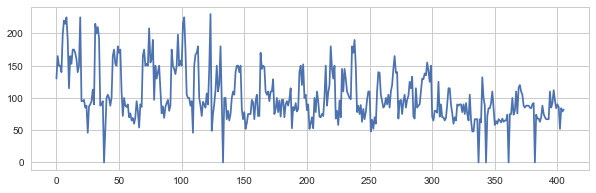

In [88]:

plt.figure(figsize=(10,3))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

To plot the histogram of a selected attribute:

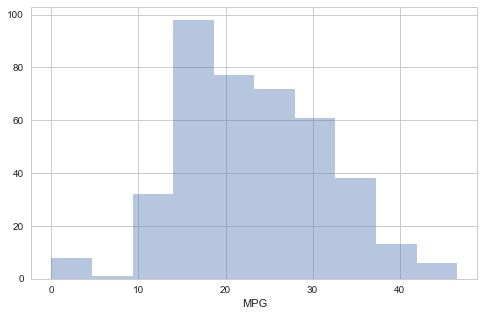

In [39]:
fig = plt.figure(figsize=(8,5))
#plt.hist(df['MPG'],bins=10);   # ; suppresses Out
sns.distplot(df['MPG'],bins=10, kde = False);


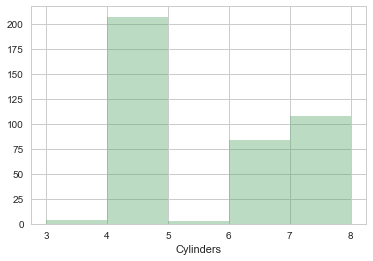

In [95]:
sns.distplot(df['Cylinders'], bins=5, kde = False, color = 'g') 

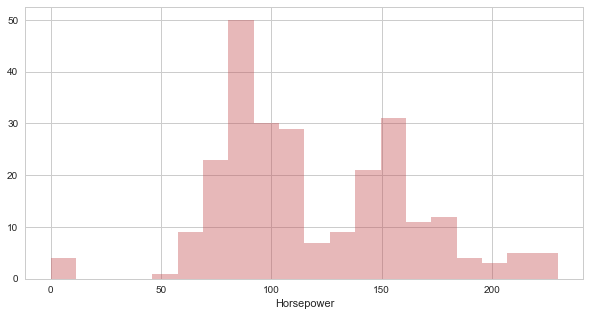

In [93]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df[df['Origin']=='US']['Horsepower'], bins=20, kde = False, color = 'r')

In [10]:

print(df['Cylinders'].std())
print(df['MPG'].std())



1.712159631548529
8.40177735227059


**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

ANSWER: The histogram for Horsepower shows that most cars have horsepower of about 80. Only a few outliers of cars that have horsepower about 0.
The standard deviation for cylinders is small, so it's best if we set the bins for cylinders small, such as 5.
The standard deviation for MPG is a bit bigger, so we can set it to 10


The following code provides statistics for number of cylinders.

In [11]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

In [12]:
newtab = pd.crosstab(df['Origin'],df['Cylinders'])
print(newtab)

Cylinders  3   4  5   6    8
Origin                      
Europe     0  66  3   4    0
Japan      4  69  0   6    0
US         0  72  0  74  108


Horizontal bar plot:

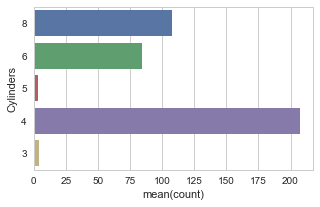

In [62]:
plt.figure(figsize=(5,3))
#plt.barh(t.index,t["count"]);
sns.barplot(y = t.index, x= t['count'], orient = 'h', order = [8,6,5,4,3])

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

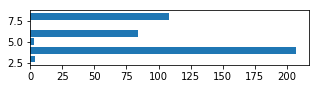

In [14]:
plt.figure(figsize=(5,1))
plt.barh(t.index,t["count"]);

Pie chart:

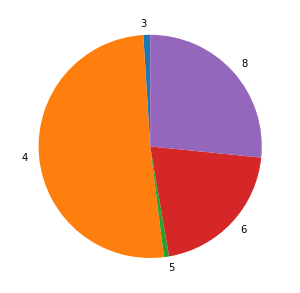

In [15]:
plt.figure(figsize=(5,5))
plt.axis("equal")
#plt.pie(t["count"],labels=t.index,startangle=90);


**Question 8**: Do you prefer bar or pie displayed chart and why? In this case, a pie chart is better since we care about the percentage. And when it comes to percentage, a pie chart is always best. However, obviously many people like barchart better because they can see the numbers more easily

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

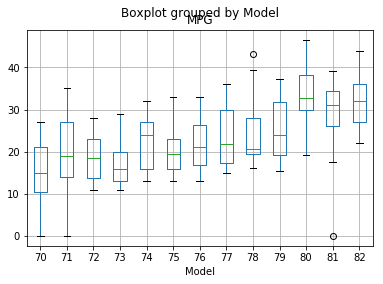

In [16]:
df.boxplot(column='MPG',by='Model'); 

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it? 

The displayed boxplot shows the median, maximum, minimum, quarters, and the outliers of MPG of the different models of cars

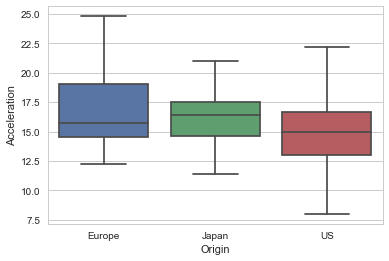

In [69]:
#df.boxplot(column = 'Acceleration', by='Origin')
sns.boxplot(x='Origin', y='Acceleration', data = df, order = ['Europe','Japan','US'])

I learned that Japan Cars have the highest median acceleration. But the maximum of Europe is the biggest.

Scatterplot between MPG and Weight attributes:

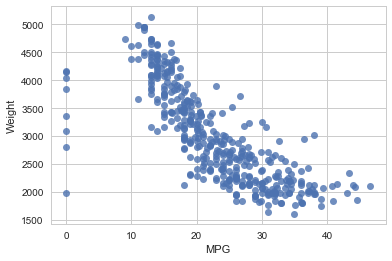

In [75]:
plt.figure(figsize=(6,4))
#plt.scatter(df['MPG'],df['Weight']);
sns.regplot(x='MPG', y='Weight', data = df, fit_reg = False)

**Question 10**: Discuss what can we learn from the displayed scatterplot. 

MPG is curvilinearly related to weight

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

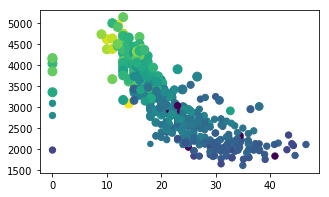

In [19]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);


**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

**ANSWER**: From the plot above we also get that horsepower seems to have negative correlation with MPG

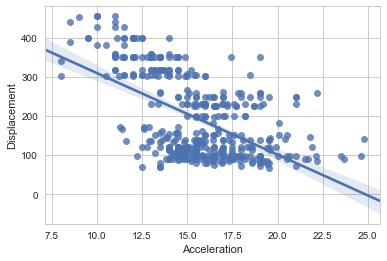

In [80]:
sns.regplot('Acceleration','Displacement', data = df, fit_reg = True)

** From the plot above, **Acceleration seems to have a negative correlation with displacement

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

C:\Users\phongtheha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


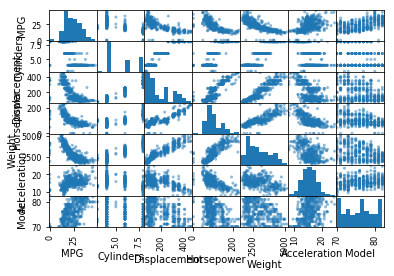

In [20]:
pd.scatter_matrix(df);

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

**Answer**: Covariance matrix. We get the correlations between variables of the dataset

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.